<a href="https://colab.research.google.com/github/221sakshisharma/coursera-ML-work/blob/main/CreditCardFraudDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas
!pip install scikit-learn
!pip install matplotlib

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, StandardScaler

from sklearn.utils.class_weight import compute_sample_weight

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score

from sklearn.svm import LinearSVC

%matplotlib inline

#Loading The Dataset

https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [ ]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/creditcard.csv"
df = pd.read_csv(url)

In [ ]:
df.shape

(284807, 31)

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#DataSet Analysis

In [ ]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.shape

(284807, 31)

In [ ]:
target_count = df['Class'].value_counts()

([<matplotlib.patches.Wedge at 0x7e1364a9aa50>,
 [Text(-1.0999838024749575, 0.0059694466019511215, 'Non Fraud'),
  Text(1.099983802996819, -0.005969350438309128, 'Fraud')],
 [Text(-0.5999911649863404, 0.0032560617828824297, '99.827%'),
  Text(0.5999911652709922, -0.0032560093299867964, '0.173%')])

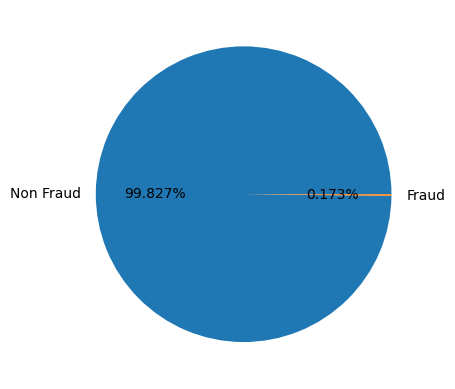

In [ ]:
plt.pie(target_count, labels=['Non Fraud', 'Fraud'], autopct='%1.3f%%')

In [ ]:
plt.figure(figsize=(10, 10))
df.corr()['Class'].drop('Class', axis=0).plot(kind='barh')

NameError: name 'plt' is not defined

#DataSet Preprocessing

In [ ]:
X = df.drop(['Class', 'Time'], axis=1)
y = df['Class']

In [ ]:
scaler = StandardScaler()

In [ ]:
X = scaler.fit_transform(X)

In [ ]:
X

array([[-0.69424232, -0.04407492,  1.6727735 , ...,  0.33089162,
        -0.06378115,  0.24496426],
       [ 0.60849633,  0.16117592,  0.1097971 , ..., -0.02225568,
         0.04460752, -0.34247454],
       [-0.69350046, -0.81157783,  1.16946849, ..., -0.13713686,
        -0.18102083,  1.16068593],
       ...,
       [ 0.98002374, -0.18243372, -2.14320514, ...,  0.01103672,
        -0.0804672 , -0.0818393 ],
       [-0.12275539,  0.32125034,  0.46332013, ...,  0.26960398,
         0.31668678, -0.31324853],
       [-0.27233093, -0.11489898,  0.46386564, ..., -0.00598394,
         0.04134999,  0.51435531]])

##Splitting Data into Training and Test Sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

#Logistic Regression Model

In [ ]:

logistic_classifier = LogisticRegression().fit(X_train, y_train)

In [ ]:
y_pred_logistic = logistic_classifier.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred_logistic)

0.9991573329588147

In [ ]:
roc_auc_score(y_test, y_pred_logistic)

np.float64(0.8073445023075716)

#Decision Tree Model

In [ ]:
w_train = compute_sample_weight('balanced', y_train)

In [ ]:
tree = DecisionTreeClassifier(max_depth=4, random_state=35)

In [ ]:
tree.fit(X_train, y_train, sample_weight=w_train)

DecisionTreeClassifier(max_depth=4, random_state=35)

In [ ]:
y_pred_tree = tree.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred_tree)

0.9485739030698829

In [ ]:
roc_auc_score(y_test, y_pred_tree)

np.float64(0.9169095571331928)

#SVM Classifier

In [ ]:
svm = LinearSVC(class_weight='balanced', random_state=31, loss="hinge", fit_intercept=False)

In [ ]:
svm.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1243: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(class_weight='balanced', fit_intercept=False, loss='hinge',
          random_state=31)

In [ ]:
y_pred_svm = svm.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred_svm)

0.9990754069964772

In [ ]:
roc_auc_score(y_test, y_pred_svm)

np.float64(0.888243861130607)